# Point Energy Balance Model

This is an interactive lab for learning about energy balance modeling. This physically based approach can be used to model snowmelt volumes, or reconstruct a snowpack (i.e. build the snowpack in reverse). There are a few levels of complexity to the equations. First we will start with the main components and then dig deeper into sucessevie layers of complexity. 

For those interested in more details and references for the material covered in this lab, refer to Section 4.1 and Appendix A of the folloing paper:
https://doi.org/10.1002/2016WR018704

How does snow melt? Snow is frozen water. The first conceptual point for understanding the melt of a snowpack, is the energy required to turn ice into water. The phase change from snow to water requires much more energy than to change the temperature of snow (or water). Positive energy balance will first warm the snow, and then melt a volume of snow, which depends on the amount of energy. Below is an example of how much snow we can melt in one hour with a given flux of energy.
## How much snow can we melt in one hour with a flux of 280 Wm<sup>-2</sup>?

In [5]:
# energy avalible to melt assuming mid day net flux of radiation into a snowpack during the melt season.
M = 280 #Wm-2 (Watts per meter squared)  (hint: 1 Watt = 1 Joule/sec)

# how much snow melts for a constant W m-2 of energy over the course of an hour?
### CONSTANTS ###
waterDensity = 1000 # density of water (kg*m-3)
eFusionWater = 3.34e5 # enthalpy of fusion for water (J*kg-1)
secPerHour = 3600 # number of seconds in one hour (s*h-1)
mmPerMeter = 1000 # number of mm in a meter (mm*m-1)
mf = (secPerHour * mmPerMeter) / (waterDensity * eFusionWater)
# melt factor - rate that snow melts per Watt of energy per square meter per hour
# can use dimensional analysis to figure out units of answer

# calculate the number of mm of water that are melted (turned from ice to liquid water) in one hour
# when there is a constant flux of 280 Wm-2 durring that hour.
# mm water / (W m^-2 hr), assuming an isothermal (0 deg C) snowpack

melt = M * mf

# print the answer to the screen along with the text 'mm of water melted in one hour per Watt of energy'

print(round(melt, 2), 'mm of water melted in one hour per Watt of energy')

# use the function round(number you want to round, number of digits) to round the number
# display a certain number of digits

3.02 mm of water melted in one hour per Watt of energy


The output above shows how much water would change phase from solid to liquid for a fixed rate of energy into the snowpack over an hour. Let's now use some real data to figure out how much water is in a snowpack.   

  
First, let's assume a deep snowpack, and we want to figure out how much water melts in the snow pack in one day. Below are the equations for the energy balance of a moutain snowpack. 

$$M = \text{flux of energy melting snow pack} $$  
  
  
## Surface Energy Balance Components    
The melt is driven by the flux of energy avalible to melt the snowpack. In our simple example above, this was 280 Wm-2. With field data, we have to calculate this net flux based on each component of the energy balance at the surface of the snowpack.   
  
  First we have to understand the net radiation being absorbed or emitted from the surface.  
  Radiation comes from the following sources:  
$$S=\text{Shortwave radiation from sun}$$  
$$\alpha=\text{snowpack albedo, how much solar radiation gets reflected}$$  
$$L_{down}=\text{longwave radiation from atmosphere}$$    
$$L_{up}=\text{emission from surface (based on temperature of the surface and emissivity)}$$    
$$R_{net}=S(1-\alpha)+L_{down}-L_{up}$$  


$$R_{net}=\text{SOLAR FLUX}+\text{LONGWAVE FLUX}$$   

We use $S(1-\alpha)$ to caclulate the amount of solar radiation absorbed by the snowpack becuase we do not diretly measure absorption $S$ and $\alpha$ are easier to measure.  $R_{net}$ is very important for energy balance modeling. 
  

  
$$R_{net} = \text{net radiation (shortwave and longwave), the flux of energy into or out of the snowpack}$$ 


$$H =  \text{sensible heat flux, i.e. raising the temperature of water in a kettle}$$   
  
$$S = \text{latent heat flux, i.e. boiling water in a kettle (phase change of the water from liquid to vapor)}$$  
  
$$G = \text{heat flow into or out of the pack, we assume this is negligible compared to the other fluxes (G=0)}$$  


Given these fluxes, we have the following equation for the energy that is avalible to melt the snowpack:  
  
$$M = R_{net} + H + L + G   \text{ and } G = 0$$  
  
$$\text{so}$$   
  
$$M = R_{net} + H + L$$  
 
 $$ \text{ENERGY TO MELT SNOWPACK} = \text{SOLAR FLUX} + \text{LONGWAVE FLUX} + \text{SENSIBLE HEAT FLUX} + \text{LATENT HEAT FLUX}$$  


for each timestep. And the snowpack only melts when there is energy (M) available to melt (otherwise it cools), so   
  
$$ M = max( R_{net} + H + L, 0 )$$

Lets now go look at some real data for all the parts of these quesitons and see how meausrements of the snowpack and the energy balance can be used to estimate SWE


We will use 2013 to 2017 Cold Regions Research and Engineering Laboratory and University of California Santa Barbara (CUES) data to explore. More information on CUES can be found here:
https://vesr.nrs.ucsb.edu/about/facilities/snarl/cues-snow-science-laboratory
https://snow.ucsb.edu/

# Run SWE Reconstruction on point data from CUES

### IMPORT NEEDED PACKAGES ###

In [6]:
#we will use the pandas, numpy, and matplotlib pyplot libraires in this tutorial
#lets import all the packages and name them with shorthand so that it is eiasier to write long funciton calls
#we also want to use nature log function and have it work when we write 'ln', the usual way it is written. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # since we are only using the plot function we are only importing that specific function
from numpy import log as ln # numpy denotes natural log as log so we renameda as ln for clarity 


### READ A CSV INTO PYTHON AS A DATAFRAME ###
Let's import the datase as a dataframe (table) to see what energy balance variables are included.  

In [12]:
# read in 6 years of energy balance data from our field station. the file we want is called CUES_2013_to_2017_EBdata.csv

EBdata = pd.read_csv('CUES_2013_to_2017_EBdata.csv')
EBdata.head() # you can run head without the brackets, but the format is not as nice
# in a data frame every row has an index
# we can set the index to the DateTime column instead

# make sure dates and times are understood by python to be dates and time, not numbers or strings
# to make a new column use [] brackets
EBdata['DateTime'] = pd.to_datetime(EBdata['DateTime'], format = '%m/%d/%Y %H:%M')

# set the date and time of a measurement to be the index for that row of data in the dataframe
# set_index is part of pandas 
# we don't have to write pd.set_index because...we already used pd with EBdata?
EBdata = EBdata.set_index('DateTime')

# take a quick look at the first few rows of the dataframe to make sure it looks correct 
# index is bolded
EBdata.head()

,uplooking_broadband_watts_per_meterxx2,uplooking_direct_watts_per_meterxx2,uplooking_diffuse_watts_per_meterxx2,uplooking_src,direct_broadband_snow_albedo,uplooking_longwave_watts_per_meterxx2,uplooking_longwave_src,wind_speed_meters_per_sec,wind_dir_deg,wind_src,...,AirTemp_C,AirTemp_C_src,RH,RH_src,AirPressure_mb,AirPressure_mb_src,SnowDepth_cm,SnowDepth_src,SWE_cm,SWE_src
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-09-01 00:00:00,0,0,0,modeled,NaN,210,measured,2.37,189.6,"measured, RM Young 5103",...,6.9,measured,0.42,measured,717.0,measured,0.0,measured,0.0,measured
2012-09-01 01:00:00,0,0,0,modeled,NaN,208,measured,2.39,204.0,"measured, RM Young 5103",...,6.7,measured,0.39,measured,716.0,measured,0.0,measured,0.0,measured
2012-09-01 02:00:00,0,0,0,modeled,NaN,205,measured,2.34,203.7,"measured, RM Young 5103",...,6.3,measured,0.39,measured,716.0,measured,0.0,measured,0.0,measured
2012-09-01 03:00:00,0,0,0,modeled,NaN,197,measured,3.80,222.3,"measured, RM Young 5103",...,5.9,measured,0.41,measured,716.0,measured,0.0,measured,0.0,measured
2012-09-01 04:00:00,0,0,0,modeled,NaN,193,measured,4.93,232.1,"measured, RM Young 5103",...,5.7,measured,0.40,measured,715.8,measured,0.0,measured,0.0,measured


In [13]:
# how many rows are in the dataframe?

len(EBdata) # len() is length

44041

In [15]:
# what are all the columns in the dataframe and their datatypes?

EBdata.dtypes

# could also write as
# EB_dTypes = EBdata.dtypes
# print(EB_dTypes)
# the advantage of this allows you to save it as a variable to use later 

uplooking_broadband_watts_per_meterxx2      int64
uplooking_direct_watts_per_meterxx2         int64
uplooking_diffuse_watts_per_meterxx2        int64
uplooking_src                              object
direct_broadband_snow_albedo              float64
uplooking_longwave_watts_per_meterxx2       int64
uplooking_longwave_src                     object
wind_speed_meters_per_sec                 float64
wind_dir_deg                              float64
wind_src                                   object
Tground_C                                 float64
Tground_C_src                              object
AirTemp_C                                 float64
AirTemp_C_src                              object
RH                                        float64
RH_src                                     object
AirPressure_mb                            float64
AirPressure_mb_src                         object
SnowDepth_cm                              float64
SnowDepth_src                              object


In [16]:
# what is the datatype of our dataframe index?

EBdata.index.inferred_type

# it's really important to know what your index is

'datetime64'

## Visualize the time series of field measurements

<AxesSubplot:xlabel='DateTime'>

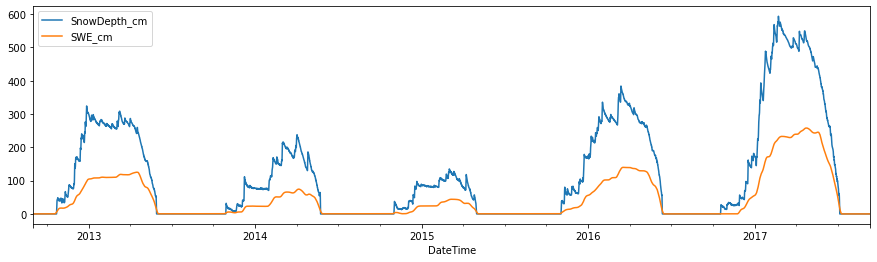

In [17]:
# plot snow depth and snow water equivalent across the whole data record

EBdata.plot(y = ['SnowDepth_cm', 'SWE_cm'], figsize = (15, 4))
            
# pd automatically assumes you want your index as the x


We can see each winter season at the point as the snow depth and the snow water equivalent increase each year and then the snow melts out each spring. There is no SWE data for the first two seasons as the instrument that measures SWE was not installed. In this lab, we will use the snow depth measurement as a snow cover identifer (snow on / snow off) along with the energy balance data collected at this site to reconstruct the snow water equivalent from the energy balance each day. We will then compare our energy balance estimate to the independent SWE measurement at the site

# Energy Balance Componenet: SOLAR FLUX

lets look at the solar radiation, the incoming solar radiation and the reflected solar radiation off the snow. The amount of reflected solar radiation is equal to the incoming solar radation that is relfectied - i.e. incoming*albedo

$$ \text{reflected solar radiation} = S*\alpha $$

In [19]:
# make a new dataframe column with the data for our new variable, reflected_solar.
# use the equation above and the existing data in the dataframe

EBdata['reflected_solar'] = EBdata['uplooking_broadband_watts_per_meterxx2'] * EBdata['direct_broadband_snow_albedo']

Lets look at one week of data in may of 2017 durring the melt season

<AxesSubplot:xlabel='DateTime'>

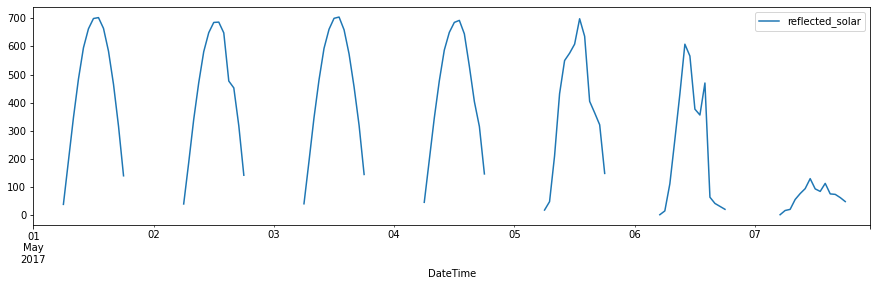

In [24]:
#plot reflected solar and incoming solar for one week on a plot to see how different/similar they are
#try a few different weeks.

EBdata.loc['5/1/2017':'5/7/2017'].plot(y = ['reflected_solar'], figsize = (15, 4))

# .loc[] is location

Can you guess which days were cloudy? which days were sunny?

The net solar flux is S(1-albedo)  
thi is the incoming solar minus the reflected solar. This is the net flux of solar energy into the snowpack each day

$$ \text{net solar flux of energy into the snowpack} = S(1-\alpha)$$

In [ ]:
#Calcluate the net flux of solar energy into the snowpack at each timestep and 
#save as a new column in the dataframe

#plot this new variable for a week of data to look at it


# Energy Balance Componenet: LONGWAVE FLUX

Lets look at the longwave energy balance. 

We do not have snow surface temperature measurements, but we can approximate,  we know when there is snow cover, from the depth meausrement, and we know that snow cannot be warmer than 0degC. So Tsnow = min(Tair,0) if snow_depth>0  

$$ T_{snow} = min( T_{air},0)   \text{  if  }   \text{snow depth}>0 $$



###### Another option is to use the dewpoint  temperature instead of air temp, see Raleigh et al 2013 http://dx.doi.org/10.1002/2013WR013958


The longwave radiation of a object is given by the Stefan Boltzman equation and is a function of the object's temperature. (hotter objects emit more radiation)

$$L_{up}=\varepsilon_{snow} \sigma T_{snow}^{4} $$

Longwave emission from surface = snow emissivity * stefan-boltzman constant * snow temperature <sup>4</sup>  

For the uplooking longwave radiation, we meausre it directly with an upward looking radiometer

In [ ]:
#snow is almost a black body emitter
snow_emissivity=0.99
celcius_2_kelvin=273.15
#stefan-boltzman constant
sbc=5.67e-8

#we want the temperature in kelvin for longwave emission calculation
#set snow surface temperature to the minimum of current air temp or 0C

#what if there is no snow? what is the correct temperature? 

#calculate the outgoing longwave emissivity of the snow form the data and the 
# stephan boltzman equation above. 


Let look at all the long wave energy balance variables over this time period.  

In [ ]:
#plot longwave radiation variables 
#(incoming longwave from the atmosphere and outgoing longwave from the snowpack)


Now that we have both componenets of longwave radiation, we can calculate the net flux of longwave radiation from these two signals.   

$$L_{down}=\text{longwave radiation from atmosphere}$$    
$$L_{up}=\text{emission from surface (based on temperature of the surface and emissivity)}$$    
$$ \text{net_longwave}=L_{down}-L_{up}$$  

In [ ]:
#Calculate net longwave and store as a new variable in the dataframe

#plot the new variable over the week 


# Radiation Fluxes for Energy Balance: Net Shortwave (solar) & Net Longwave Radiation

Now we have calculated both the net solar and net longwave energy fluxes. These are all the energy flux from radiated energy that go into the energy balance at the surface of the snowpack. Lets plot them and see how they relate before moving on to the sensible and latent heat fluxes. 

In [ ]:
#plot net solar and new longwave, look at a few different weeks


# Energy Balance Componenet: SENSIBLE HEAT FLUX
sensible heat flux = density of air * specific heat of air at constant pressure * (Tair - Tsurface) / aerodynamic resistance over snow adjusted for instability  
$$H=\rho_aC_pD\zeta(T_a-T_s)$$

#### The most importnat point to remember for sensible heat flux is that it is driven by both the temperature difference between the surface and the air and the amont of 'mixing' (wind!) at the surface. As mixing increases and as the temperature difference increases, the sensible heat flux increases.

In [ ]:
#constants needed to calculate heat exchanges
Cp=1010 # #specific_heat_of_air J/(kg deg)
k=0.41#Von Karman's constant
eta=9.4 #stability function constant
phi=5.3 #stability function constant
g=9.8 # gravity m/s2
celcius_2_kelvin=273.15 #temperatures must be in kelvin
kPa_0=101.325; # sea level pressure kPa.
rho_0=1.29 # sea level rho
z0=0.0005# m roughness height (0.5mm)

#variables needed to perform heat exchange calculations
Ts=EBdata['snow_surface_temp']+celcius_2_kelvin
Ta=EBdata['AirTemp_C']+celcius_2_kelvin
u=EBdata['wind_speed_meters_per_sec'] #m/s
zR=(600-EBdata['SnowDepth_cm'])/100 # meters height of windspeed measurement 6m above bare ground - correct for snow depth
kPa_alt=EBdata['AirPressure_mb']/10 #measured pressure at snow study site, convert mb to kPa
#air_density (rho) alt adj. density air,kg/m^3
rho_air=rho_0*(kPa_alt/kPa_0);


#heat_exchange_coefficent (also used for latent heat flux calculation)
D=(u*k**2)/((ln(zR/z0))**2)

#nondimensional stability function, three situations (neutral,stable,unstable) (also used for latent heat flux calculation)
#unstable(Ts>Ta)
#gamma=phi*eta*(k/(ln(zR/z0)))**2*np.sqrt(zR/z0)
C1=phi*eta*(k/(ln(zR/z0)))**2*np.sqrt(zR/z0)

#Ri=(g*zR*(Ta-Ts))/(Ta*u**2)
C2=g*zR/(Ta*u**2)

B1=eta*C2
B2=C1*np.sqrt(np.absolute(C2))
B3=1+B2*np.sqrt(np.absolute(Ts-Ta))

#unstableConditions=1-(eta*Ri)/(1+gamma*np.sqrt(np.absolute(Ri)))
unstable=1+B1*(Ts-Ta)/B3

#stable(Ts<Ta)
#stableConditions=1+(eta/2)*Ri
B8=B1/2
stable=1/((1+B8*(Ta-Ts))**2)

#neutral stability assumption first (Ts==Ta) 
stability=np.ones_like(unstable)

#fill in unstable times (Ts>Ta)
unstableIdx=Ts>Ta
stability[unstableIdx]=unstable[unstableIdx]

#fill in stable times (Ts<Ta)
stableIdx=Ts<Ta
stability[stableIdx]=stable[stableIdx]

#add sensible heat flux as a new column to the dataframe
EBdata['Sensible_Heat_Flux']=rho_air*Cp*D*stability*(Ta-Ts)

lets plot some of the variables by themselves and make sure they look right - plot various variables to see what they look like across the season
## Plot various measurements that go into calculating the sensible heat flux

In [ ]:
#try plotting zR first, and explain what it is.then try some others. 


## Plot the sensible heat flux

In [ ]:
#plot over a week


# Energy Balance Componenet: LATENT HEAT FLUX
latent heat flux = latent heat of vaporization or sublimation* density of air * (0.622/air pressure) * (vapor pressure of air - saturated vapor pressure of snow surface)  
$$L=\rho_a\lambda_{v,s}D\zeta(\theta\frac{e_a-e_s}{P_z})$$

#### The most importnat point to remember for latent heat flux is that it is driven by both the vapor pressure difference between the surface and the air and the amont of 'mixing' (wind!) at the surface. As mixing increases and as the vapor pressure difference increases, the latent heat flux increases.

In [ ]:
#information from sensible heat flux calcualtion we need for latent heat flux calculation
Ts=Ts
Ta=Ta
rho_air=rho_air
Pa_alt=kPa_alt*1000
D=D

#new information needed for latent heat flux calculation
theta=0.622 # ratio of molecular weight of water to air
latent_heat_of_sublimation=2834700 #J/kg
latent_heat_of_vaporization=2501000 #J/kg
RH=EBdata['RH']
Ta_C=EBdata['AirTemp_C']

#vapor pressure of the air
#calculated based on the saturation vapor pressure of the dewpoint temperature 
# as in: (Raleigh et al (2013) doi:10.1002/2013WR013958)
c=273.86
b=22.587
#celcius dewpoint temp
TdC=c*(ln(RH)+b*Ta_C/(c+Ta_C))/(b-ln(RH)-b*Ta_C/(c+Ta_C))
#dewpoint temp (K)
Td=TdC+273.15
T0=273.16
es0=0.611 #saturation vapor pressure in kPa at 273.16K
Lwater=6808*(1/T0-1/Td)-5.09*ln(Td/T0)
vp=es0*np.exp(Lwater)
#saturation vapor pressure of ice at dewpoint temp (if air temp is below 0C)
Lice=6293*(1/T0-1/Td)-0.555*ln(Td/T0)
resetVp=Td<=T0
#Lice[Lice!=resetVp]=np.nan
vp_ice=es0*np.exp(Lice)
vp[resetVp]=vp_ice[resetVp]
eA=vp*1000 #eA and eS are in Pa, not kPa


#saturation vapor pressure at the snow surface (vapor pressure over ice from Buck 1981) (e at the snow surface)
Tf=273.15
A=6.1115*100
B=22.452
C=272.55
eS=A*np.exp((B*(Ts-Tf))/(C+(Ts-Tf)))
#enthalpy of vaporization or sublimation 
#is liquid water in the snow evaporating or ice sublimating?
#vapor pressure is greater at the snow surface - we assume sublimation - (use enthalpy of sublimation) 
#or greater in the air above the snow - we assume vaporization - (use enthalpy of vaporization)
xLs=np.full_like(eS,latent_heat_of_sublimation) #set all to sublimation
xLs[eS<eA]=latent_heat_of_vaporization #set to vaporization if nessesary

EBdata['Latent_Heat_Flux']=rho_air*xLs*D*stability*(theta*((eA-eS)/Pa_alt)) # no adjustments for vegetation emitted longwave

In [ ]:
#plot a few of the latent heat equation variables to make sure they look correct


In [ ]:
#plot the latent heat flux


# Plot all energy balance components
Lets look at each componenet of the energy balance for this week. We can take the individual coponents and look at the net flux of energy into or out of the snowpack at each hourly timestep

In [ ]:
#calculate the net flux

#plot net flux and all energy balance components that go into net flux


Solve the energy balance each day for potiental melt
$$M_p=max(R_{net}+H+L,0)$$

In [ ]:
#calculate avalible energy to melt snow at each time step


# Plot the energy avalible to melt the snowpack

In [ ]:
#plot energy avalible to melt snow at each time step for a week of data 
#look at a week in the spring and then a week in the middle of winter


# SWE RECONSTRUCTION

Reconstruction works backwards up to peak SWE, lets figure out the timeperiod to run our model based on the SWE measurements at CUES. We will figure out the dates to run reconstruction based on peak SWE date to melt out date. Because the reconstruciton method is independent from the SWE pillow measurements, we can compare the two results at the end

In [ ]:
#lets focus on the 2017 water year, create a new dataframe of all the data for the 2017 water year


#what was the date of peak SWE and volumne of water in the snowpack that day?


#what is the melt out date of the snowpack?

#plot SWE across the water year and add a marker for peak SWE and melt out date                                    

#print in senteces the maximum SWE, max SWE date, melt out date



Now lets use our energy balance information to backcalculate the SWE each day from melt out date to peak SWE date and then compare our energy balance SWE estimate to the snow pillow data

In [ ]:
#select valid time steps for summing melt over


#how much snow melts for a constant W m-2 of energy over the course of an hour?
melt_factor=0.0108  # mm/((W/m2)h)

#cumulative sum of the melt_per_hour from melt out date back to peak SWE



## melt per hour from reconstruciton

In [ ]:
#plot the melt per hour for the entire water year and put the legend in the upper right 


## Total reconstructed SWE

In [ ]:
#plot the total reconstructed SWE acrss the water year


# Hourly melt and reconstruction comparison

In [ ]:
#compare a plot of the melt per hour and the total SWE reconstruction over all days (the cumulative sum of melt)


As you can see from above, a little melt each hour adds up to a lot of snow.
  
    
Lets now look at our reconstructed snow water equivalnet compared to the measured SWE at the snow pillow.
### and of course it matches nearly perfectly :)

In [ ]:
#our data set contains an indepenent measure of SWE - snow pillow data. lets compare the remote sensing
#based energy balance estimate to the pillow measurement to see how similar they are
